# Coin Detection

## Loading the images of coins and the canvas and displaying them

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

coins = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/coins.png')
dime = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Dime.png')
nickel = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Nickel.png')
penny = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Penny.png')
quarter = cv.imread('C:/Users/nadil/Desktop/EN3160_Image_Processing_and_Machine_Vision/week_3/coin_images/Quarter.png')


(-0.5, 299.5, 299.5, -0.5)

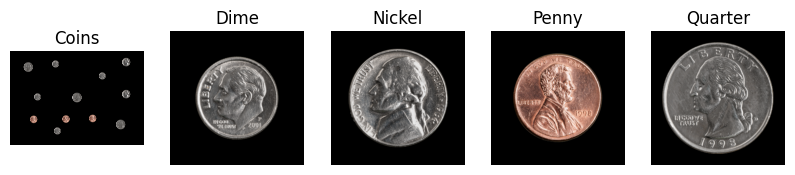

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(cv.cvtColor(coins, cv.COLOR_BGR2RGB))
plt.title('Coins')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(cv.cvtColor(dime, cv.COLOR_BGR2RGB))
plt.title('Dime')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(cv.cvtColor(nickel, cv.COLOR_BGR2RGB))
plt.title('Nickel')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(cv.cvtColor(penny, cv.COLOR_BGR2RGB))
plt.title('Penny')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(cv.cvtColor(quarter, cv.COLOR_BGR2RGB))
plt.title('Quarter')
plt.axis('off')

## Template matching for the Dime, Nickel, Penny and the Quarter

In [15]:
penny_result = cv.matchTemplate(coins, penny, cv.TM_CCOEFF_NORMED)
dime_result = cv.matchTemplate(coins, dime, cv.TM_CCOEFF_NORMED)
nickel_result = cv.matchTemplate(coins, nickel, cv.TM_CCOEFF_NORMED)
quarter_result = cv.matchTemplate(coins, quarter, cv.TM_CCOEFF_NORMED)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3251011..0.9999999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29699415..0.99999976].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31560078..0.9999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31468955..0.99999976].


(-0.5, 3208.5, 2180.5, -0.5)

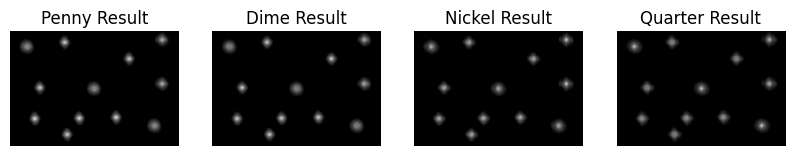

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(cv.cvtColor(penny_result, cv.COLOR_BGR2RGB))
plt.title('Penny Result')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(cv.cvtColor(dime_result, cv.COLOR_BGR2RGB))
plt.title('Dime Result')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(cv.cvtColor(nickel_result, cv.COLOR_BGR2RGB))
plt.title('Nickel Result')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(cv.cvtColor(quarter_result, cv.COLOR_BGR2RGB))
plt.title('Quarter Result')
plt.axis('off')


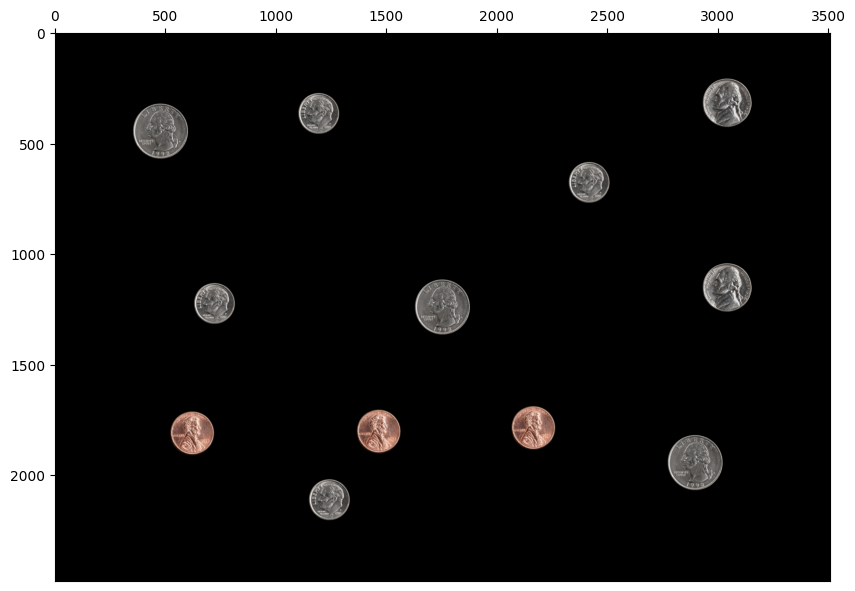

In [17]:
# Displaying the coins canvs before drawing rectangles
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
ax.imshow(cv.cvtColor(coins, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

## Drawing the bounding boxes and calculating the total amount

In [18]:
# Defining the heights and widths of the cropped images
wd = dime.shape[1]
hd = dime.shape[0]

wn = nickel.shape[1]
hn = nickel.shape[0]

wp = penny.shape[1]
hp = penny.shape[0]

wq = quarter.shape[1]
hq = quarter.shape[0]


In [19]:
# Getting the x and y coordinates of the matches
y_loc_p, x_loc_p = np.where(penny_result>=0.99)
y_loc_d, x_loc_d = np.where(dime_result>=0.99)
y_loc_n, x_loc_n = np.where(nickel_result>=0.99)
y_loc_q, x_loc_q = np.where(quarter_result>=0.99)


In [20]:
# Drawing bounding boxes
for (x,y) in zip(x_loc_d,y_loc_d):
    cv.rectangle(coins, (x,y), (x+wd,y+hd),(255,0,0),2)

for (x,y) in zip(x_loc_n,y_loc_n):
    cv.rectangle(coins, (x,y), (x+wn,y+hn),(0,255,0),2)

for (x,y) in zip(x_loc_p,y_loc_p):
    cv.rectangle(coins, (x,y), (x+wp,y+hp),(0,0,255),2)

for (x,y) in zip(x_loc_q,y_loc_q):
    cv.rectangle(coins, (x,y), (x+wq,y+hq),(0,255,255),2)

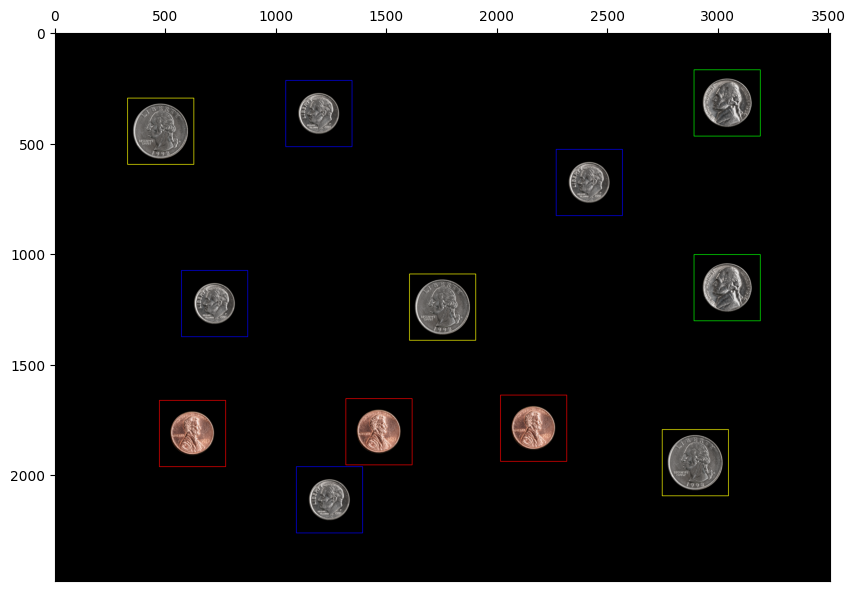

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
ax.imshow(cv.cvtColor(coins, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

### Data of the depictions and coins
- Dime - $0.10 - Blue Color 
- Nickel - $0.05 - Green Color 
- Penny - $0.01 - Red Color 
- Quarter - $0.25 - Yellow Color 

In [22]:


tot_val = len(x_loc_d)*0.1 + len(x_loc_n)*0.05 + len(x_loc_p)*0.01 + len(x_loc_q)*0.25

print("Total Value: $",tot_val)

Total Value: $ 1.28


## Assumptions
1. Sample images are exact crop images from the canvas
2. Template matching threshold near 1 means an exact match